# Centrality distribution parameters

Tested to look at the mean, std, skewness and kurtosis of the centrality distribution for incomplete and complete tracksters. There were quite some difference in distribution between eigen and pagerank centrality so worth to compare values for different centralities. Unsure if it is good parameters to look at.

In [52]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm
import networkx as nx
import scipy.stats

In [59]:
filename = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_200e.root"
datasetName="200e dataset"
file = uproot.open(filename)
tracksters = file["tracksters"]
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()
vertices_Labels=tracksters['trackster_label'].array()

In [60]:
tooSmall = ak.num(vertices_indexes,axis=-1) > 2
vertices_indexes_g = vertices_indexes[tooSmall]
vertices_x_g = vertices_x[tooSmall]
vertices_y_g = vertices_y[tooSmall]
vertices_z_g = vertices_z[tooSmall]
vertices_E_g = vertices_E[tooSmall]
vertices_Labels_g=vertices_Labels[tooSmall]
print(len(vertices_indexes_g))

46769


In [67]:
comCenParams=[]
incCenParams=[]

N_tr = len(vertices10e_indexes_g)
#N_tr=1000

for i in range(N_tr):
    v_ind=vertices10e_indexes_g[i]
    v_x=vertices10e_x_g[i] 
    v_y=vertices10e_y_g[i]
    v_z=vertices10e_z_g[i]
    v_E=vertices10e_E_g[i] 
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E
    )
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())

    #centrality=fn.nXCentralityEigen(v_ind,edges_1,False)
    centrality=fn.centralityPageRank(v_ind,edges_1,0.85,True)
    #centrality=fn.centralityPageRank(v_ind,edges_1,0.85,False)
    
    if(vertices_Labels_g[i]==1):
        comCenParams.append([np.mean(centrality),np.std(centrality)
                             ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])
    else:
        incCenParams.append([np.mean(centrality),np.std(centrality)
                             ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])



In [68]:
comCenParams=np.asarray(comCenParams)
incCenParams=np.asarray(incCenParams)
centralityName=" PageRank Directed"

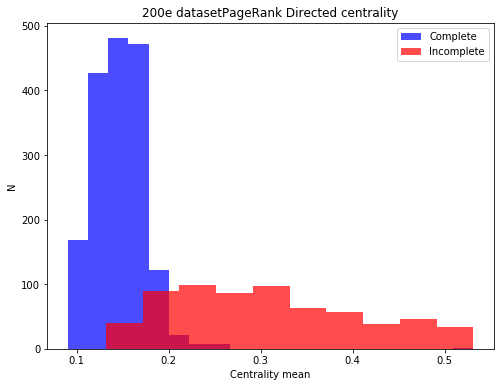

In [69]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,0], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(incCenParams[:,0], bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Centrality mean")
plt.title(datasetName+centralityName+" centrality")
plt.show()

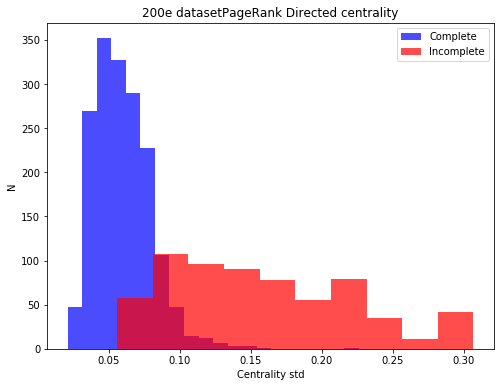

In [70]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,1], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(incCenParams[:,1], bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Centrality std")
plt.title(datasetName+centralityName+" centrality")
plt.show()

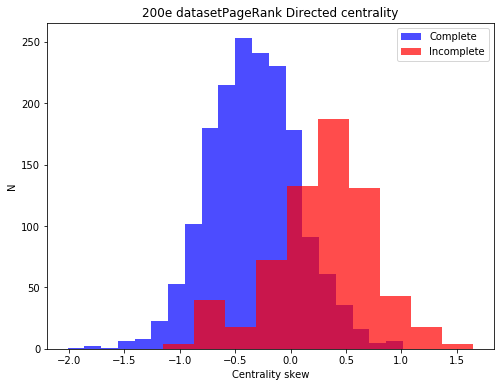

In [71]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,2], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(incCenParams[:,2], bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Centrality skew")
plt.title(datasetName+centralityName+" centrality")
plt.show()

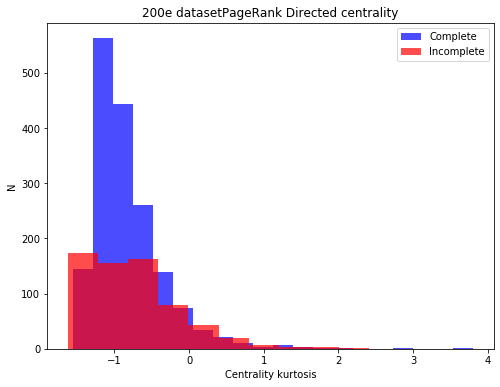

In [72]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,3], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(incCenParams[:,3], bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Centrality kurtosis")
plt.title(datasetName+centralityName+" centrality")
plt.show()